In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/train.csv')

In [3]:
df1=pd.read_csv('/content/test.csv')

In [4]:
df2=pd.read_csv('/content/gender_submission.csv')

In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [8]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:\n{df[col].value_counts()}")


Name:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

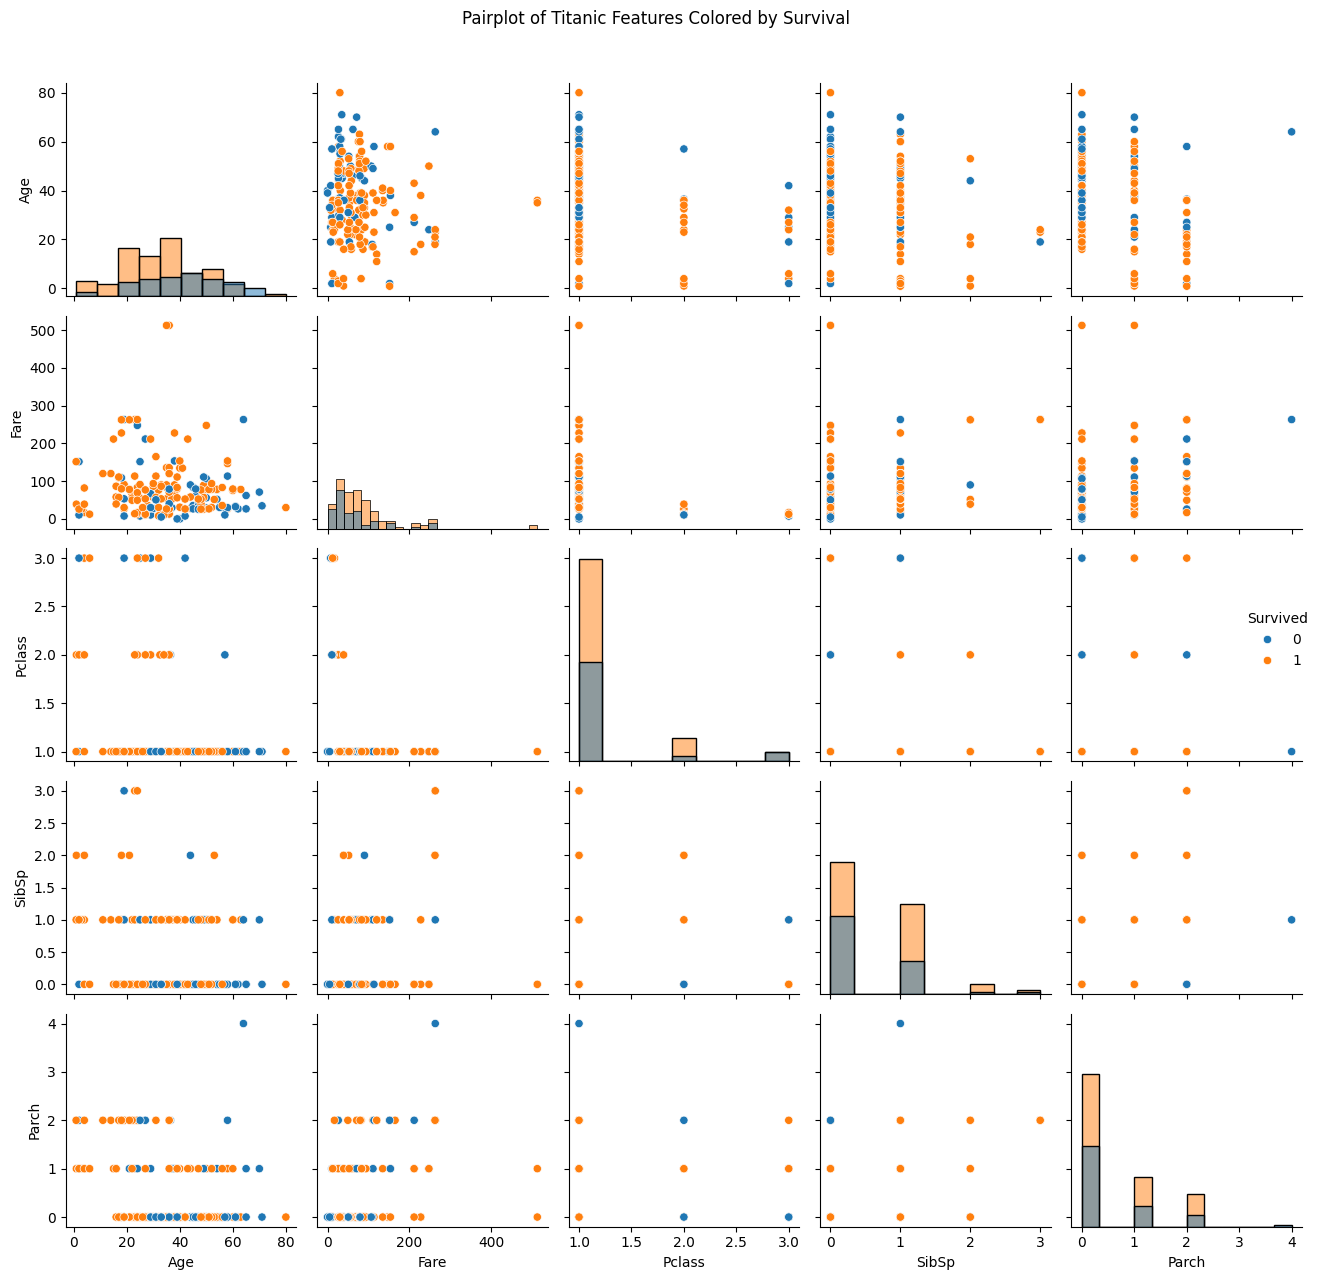

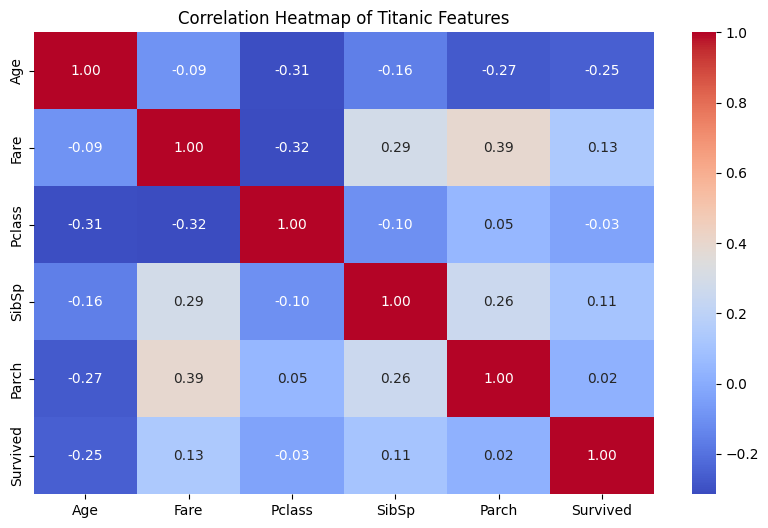

In [11]:
df = df.dropna()


features_to_plot = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
pairplot_data = df[features_to_plot + ['Survived']]


sns.pairplot(pairplot_data, hue="Survived", diag_kind="hist")
plt.suptitle("Pairplot of Titanic Features Colored by Survival", y=1.02)
plt.tight_layout()
plt.show()


correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Titanic Features")
plt.show()



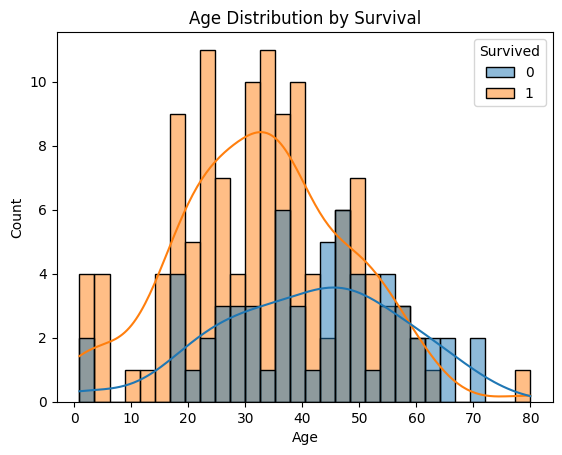

In [13]:
sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


Observation:

Younger passengers (0–10 years) had a higher survival rate.

A large portion of adults (20–40) didn’t survive.

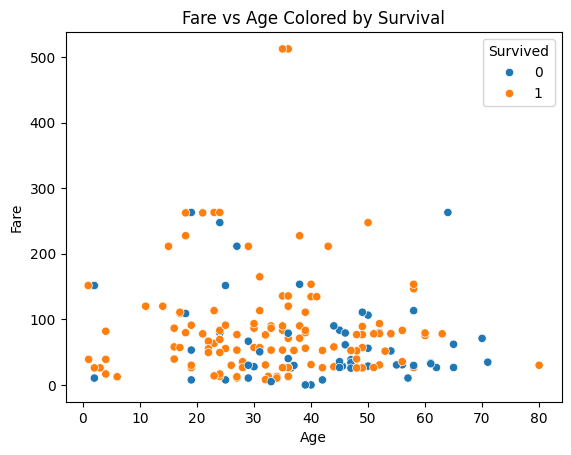

In [17]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived")
plt.title("Fare vs Age Colored by Survival")
plt.show()


Observation:

Older passengers tended to pay a wide range of fares.

Many lower-fare passengers didn’t survive; higher-fare passengers were more likely to survive.

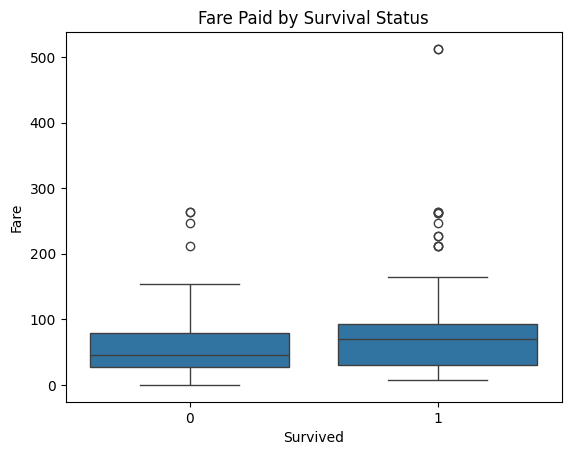

In [15]:
sns.boxplot(data=df, x="Survived", y="Fare")
plt.title("Fare Paid by Survival Status")
plt.show()


Observation:

Survivors generally paid higher fares.

There are outliers (some paid very high fares), mostly among survivors.